In [1]:
# get_ipython().magic(u'config IPCompleter.greedy=True')

In [2]:
import requests
import configparser
import json
import pandas as pd
from datetime import date, timedelta
from ocs_sample_library_preview import *

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

ocsClient = OCSClient(config.get('Access', 'ApiVersion'), config.get('Access', 'Tenant'), config.get('Access', 'Resource'), 
                        config.get('Credentials', 'ClientId'), config.get('Credentials', 'ClientSecret'))

namespaceId = config.get('Configurations', 'Namespace')
namespaceId

'Derek'

In [ ]:
#dateFrom = '2020-01-12'
#dateTo ='2020-01-23'
dateFrom = 'Mar 11, 2020, 12:00:00 AM' #str(date.today()-timedelta(days=10))
dateTo = 'Mar 12, 2020, 12:00:00 AM'# str(date.today()) #10 days of data
timeinterval = '00:01:00' #interpolate every minute

#dataviewId = Wind Turbine Data_NN, where NN is your specific student number (e.g. NN=01 in this example)
dataviewId= "Wind Turbine Data"

data, n, f = ocsClient.DataViews.getDataInterpolated(namespaceId, dataviewId, startIndex=dateFrom, endIndex=dateTo, 
                                                         interval=timeinterval, count=150000)
data



In [5]:
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df

,Active Power,Air Temperature,Blade1 Actual,Blade2 Actual,Blade3 Actual,Nacelle Position,Rotor Speed,State,Timestamp,Turbine,Wind Speed
0,393.81445,57.547790,-0.543748,-0.508561,-0.111478,304.80900,15.482932,16,2020-03-11 00:00:00,GE01,6.947662
1,405.43518,57.531895,-0.541356,-0.506288,-0.098839,304.64220,14.812955,16,2020-03-11 00:01:00,GE01,6.636685
2,307.92307,57.516000,-0.538963,-0.504015,-0.086199,304.47540,13.750278,16,2020-03-11 00:02:00,GE01,6.979335
3,618.70000,57.500107,-0.536571,-0.501742,-0.073560,304.30860,17.696032,16,2020-03-11 00:03:00,GE01,7.525977
4,641.00000,57.484210,-0.534179,-0.499470,-0.060921,304.21494,17.967062,16,2020-03-11 00:04:00,GE01,8.931692
5,369.75000,57.468315,-0.531786,-0.497197,-0.048281,304.29200,14.665382,16,2020-03-11 00:05:00,GE01,7.206466
6,478.80000,57.452420,-0.529394,-0.494924,-0.035642,304.36905,16.251783,16,2020-03-11 00:06:00,GE01,6.801806
7,657.55000,57.436523,-0.527002,-0.492652,-0.023003,304.44608,17.437292,16,2020-03-11 00:07:00,GE01,8.190707
8,871.66670,57.420628,-0.524609,-0.490379,-0.010363,304.52313,19.132862,16,2020-03-11 00:08:00,GE01,9.397439
9,563.49230,57.404730,-0.522217,-0.488106,0.002276,304.60020,17.187315,16,2020-03-11 00:09:00,GE01,7.469274


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Renaming DataFrame column names to abbreviations, in order to display these column names clearly in a correlation plot 

df.rename(columns = {'Blade1 Actual':'BL1', 'Blade2 Actual':'BL2', 
                     'Blade3 Actual':'BL3', 'Rotor Speed':'RS','Turbine':'TS', 
                     'Active Power':'AP', 'Nacelle Position':'NP', 'Air Temperature':'AT',
                     'Wind Speed':'WS'}, inplace = True)

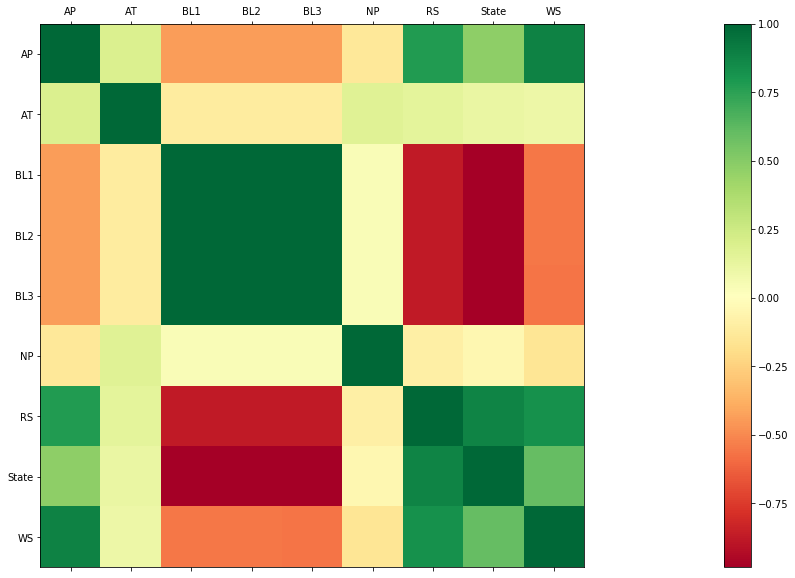

In [8]:
#Check the correlation between Active Power and the rest of the variables

#retrieve the correlation table
df_corr = df.corr()

#increase the size of the figure
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)

#set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

#configure the labels
labels = [c for c in df_corr.columns]

#make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [9]:
#Renaming DataFrame column names from abbreviations back to their original full names

df.rename(columns = {'BL1':'Blade1', 'BL2':'Blade2', 
                     'BL3':'Blade3', 'RS':'Rotor Speed Value','TS':'Turbine', 
                     'AP':'Active Power Value','NP':'Nacelle Position Value', 'AT':'Air Temperature Value',
                     'WS':'Wind Speed Value'}, inplace = True)

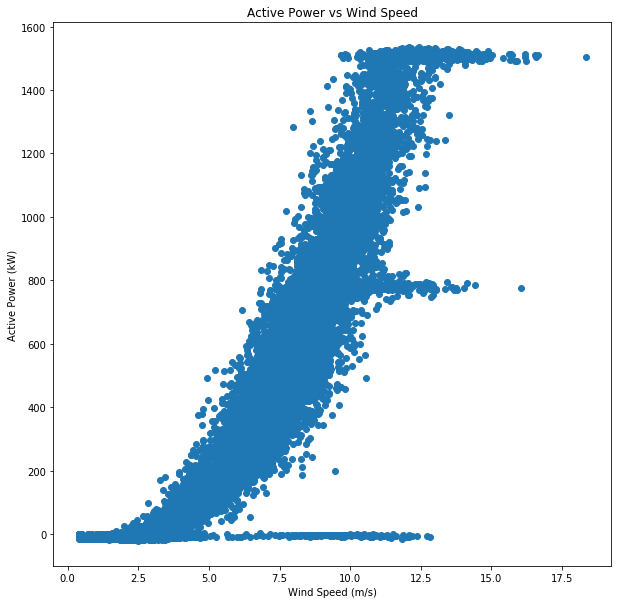

In [10]:
#Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df['Wind Speed Value'], df['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [11]:
# df = df.dropna()

In [12]:

# df = df.dropna() #not needed
#Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
filterOutGE05 = df['Turbine'] != "GE05"
df_Filter = df[filterOutGE05]

In [13]:
#Filter out negative & excessive Active Power Values
filterNegativeActivePower = (df_Filter['Active Power Value'] >= 0) 
df_Filter = df_Filter[filterNegativeActivePower]

In [14]:
#Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = (~((df_Filter['Wind Speed Value'] >  10) & (df_Filter['Active Power Value'] <600)))
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [15]:
#Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter['State'] == 16
df_Filter = df_Filter[filterLoadOperationState]

In [16]:
#Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter['Wind Speed Value'] <13
df_Filter = df_Filter[filterOutHighWind]

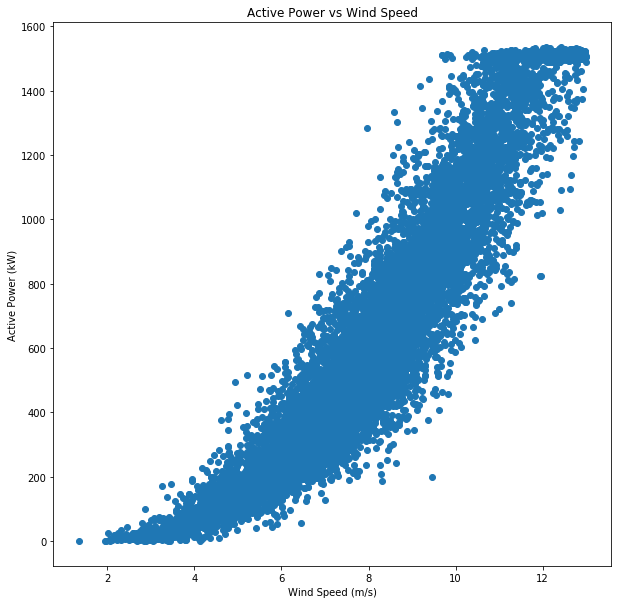

In [17]:
#Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter['Wind Speed Value'], df_Filter['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [18]:
#Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split
#define the target variable to be predicted
y = df_Filter['Active Power Value'].values
#split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_Filter[['Air Temperature Value', 'Wind Speed Value']].values, 
                                                    y, test_size=0.25, random_state=42)

In [19]:
#Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

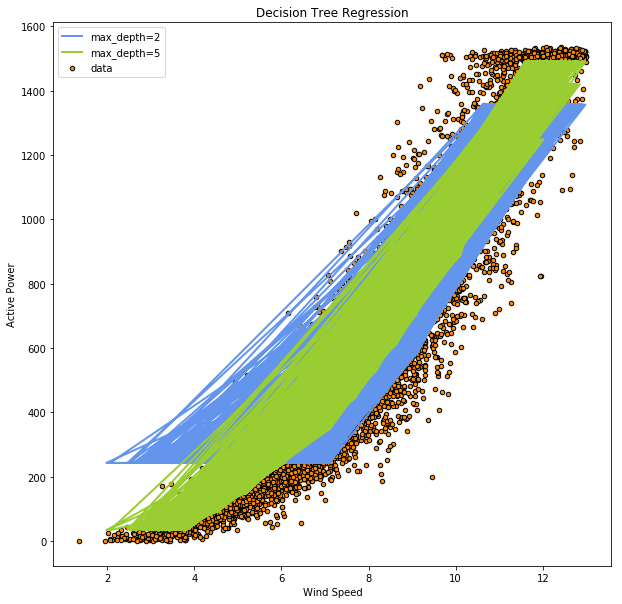

In [20]:
# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,1], y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test[:,1], y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test[:,1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [21]:
#save the machine learning model to disk
import pickle
filename = 'WT_ActivePower_model.sav'
pickle.dump(regr_2, open(filename, 'wb'))

In [22]:
#Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, 'rb'))
global result
result = loaded_model.score(X_test, y_test)
#print the model score
print(result)

0.9087426525813225


In [23]:
#Sample prediction
# define input
new_input = [[45, 6.6]] #Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[348.57358041]


In [24]:
#Call the OpenWeather API to retrieve the forecasted air temperature and wind speed for Amarillo, TX for the next 5 days
import requests
url="https://api.openweathermap.org/data/2.5/forecast?q=Amarillo,US&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast=requests.get(url)

In [ ]:
responseWeatherForecast.json()

In [26]:
#Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime
TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9/5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(TimestampArray.append(datetime.datetime.strptime(val["dt_txt"], '%Y-%m-%d %H:%M:%S')))   
          
dfWeatherForecast = pd.DataFrame({'Timestamp':TimestampArray, 'Temp (F)':TempArray, 'Wind Speed (m/s)':WindSpeedArray})        
                              
dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s)
0,2020-07-09 18:00:00,102.42,5.91
1,2020-07-09 21:00:00,104.54,7.19
2,2020-07-10 00:00:00,102.43,4.40
3,2020-07-10 03:00:00,87.44,1.52
4,2020-07-10 06:00:00,84.72,7.96
5,2020-07-10 09:00:00,82.38,7.53
6,2020-07-10 12:00:00,78.12,4.63
7,2020-07-10 15:00:00,80.76,6.04
8,2020-07-10 18:00:00,91.27,3.72
9,2020-07-10 21:00:00,99.52,2.22


In [27]:
#Use the machine learning model developed previously to predict the Active Power and add the values to the existing Data Frame

import pickle
filename = 'WT_ActivePower_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

PredictedPowerArray=[]  

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row['Temp (F)'], row['Wind Speed (m/s)']]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))
    
dfWeatherForecast['Predicted Active Power (kW)']=pd.DataFrame(PredictedPowerArray)

dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s),Predicted Active Power (kW)
0,2020-07-09 18:00:00,102.42,5.91,242.122865
1,2020-07-09 21:00:00,104.54,7.19,562.699881
2,2020-07-10 00:00:00,102.43,4.40,92.285506
3,2020-07-10 03:00:00,87.44,1.52,34.123415
4,2020-07-10 06:00:00,84.72,7.96,595.954338
5,2020-07-10 09:00:00,82.38,7.53,562.699881
6,2020-07-10 12:00:00,78.12,4.63,148.488162
7,2020-07-10 15:00:00,80.76,6.04,242.122865
8,2020-07-10 18:00:00,91.27,3.72,34.123415
9,2020-07-10 21:00:00,99.52,2.22,34.123415


In [28]:
#Save data back to prediction stream in OCS

StreamId = "WT_5dForecast_01"
values = []

for index, row in dfWeatherForecast.iterrows():
        values.append({"Air_Temperature": row["Temp (F)"], "Wind_Speed": row["Wind Speed (m/s)"], 
                       "Predicted_Active_Power": row["Predicted Active Power (kW)"], "Timestamp": 
                       row["Timestamp"].strftime('%Y-%m-%d %H:%M:%S') })

ocsClient.Streams.updateValues(namespaceId, StreamId, json.dumps(values))
global finished
finished = True

In [ ]:
def test_result():   
    global result

    assert result is not None
    
def test_finished():   
    global finished
    
    assert finished
